In [266]:

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

#Importing the ML library 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [267]:
###PART ONE 

In [268]:
#import the file
df=pd.read_csv('wheather_data.csv')

df.head()

,id,timestamp,value,identifier,value_type_id,location_id,source_id
0,427436,2019-04-25 13:20:09,1021.80,PMSL,20,23.0,5
1,427439,2019-04-25 13:20:09,12.00,TDP,15,23.0,5
2,427434,2019-04-25 13:20:09,0.00,P6H,13,23.0,5
3,427435,2019-04-25 13:20:09,0.51,P24H,14,23.0,5
4,427440,2019-04-25 13:20:09,3.00,UVI,16,23.0,5


In [269]:
k=df[['id','value','value_type_id','location_id','source_id']].describe()

In [270]:
# The mean value of each numerical column 
k.loc[['mean']]

,id,value,value_type_id,location_id,source_id
mean,4.678257e+06,153.45302,35.833573,38.873038,5.744032


In [271]:
# The minimum value of each numerical column 
k.loc[['min']]

,id,value,value_type_id,location_id,source_id
min,427433.0,-0.019,11.0,23.0,5.0


In [272]:
# The maximum value of each numerical column 
k.loc[['max']]

,id,value,value_type_id,location_id,source_id
max,6426617.0,1021.9,66.0,152.0,10.0


In [273]:
# The unique values of the categorical data: here the 'identifier' the 'location_id', the 'source_id' and the 'value_type_id'
print('The unique identifiers:',df['identifier'].unique(),'and the length of the array:',len(df['identifier'].unique()))


The unique identifiers: ['PMSL' 'TDP' 'P6H' 'P24H' 'UVI' 'WD' 'T' 'P1H' 'WS' 'RH' 'CC' 'P3H' 'SM0'
 'SM30' 'SM100' 'ST0' 'PC' 'P' 'ETref' 'ETmodel' 'ST100' 'ST30' 'ST10'
 'pressureMeanSeaLevel'] and the length of the array: 24


In [274]:
print('The unique location-ids:',df['location_id'].unique(),'and the length of the array:',len(df['location_id'].unique()))


The unique location-ids: [ 23.  27.  30. 116. 152.] and the length of the array: 5


In [275]:
print('The unique source_id:',df['source_id'].unique(),'and the length of the array:',len(df['source_id'].unique()))


The unique source_id: [ 5  6 10] and the length of the array: 3


In [276]:
print('The unique value_type_id:',df['value_type_id'].unique(),'and the length of the array:',len(df['value_type_id'].unique()))


The unique value_type_id: [20 15 13 14 16 17 11 12 18 19 27 21 24 23 26 25 22 28 29 30 35 36 55 41
 43 39 42 40 38 37 45 49 50 48 46 47 51 58 62 59 65 60 61 64 63 66 57] and the length of the array: 47


In [277]:
#The frequency that each identifier appers in the dataset
df1 = df['identifier'].value_counts()
#The frequency that each value_type_id appers in the dataset
df11 = df['value_type_id'].value_counts()
#The frequency that each source_id appers in the dataset
df12 = df['source_id'].value_counts()
#The frequency that each location_id appers in the dataset
df13 = df['location_id'].value_counts()
print(df1)
#print(df11)
#print(df12)
#print(df13)

T                       47790
RH                      47789
PMSL                    47767
WS                      47742
WD                      47311
UVI                     40979
PC                      30540
P                       25308
TDP                     15676
P1H                     15675
CC                      11988
P6H                     10444
P24H                    10443
SM0                      1027
ST0                      1024
SM100                     815
SM30                      815
ETref                     813
ETmodel                   813
ST100                     812
ST30                      812
ST10                      209
P3H                       106
pressureMeanSeaLevel       21
Name: identifier, dtype: int64


In [278]:
#Another way to find how frequently a catecorical data appears is to group the dataset by the exact parameter

In [279]:
#Here I group the dataset by identifier
df.groupby(by=["identifier"]).count()

,id,timestamp,value,value_type_id,location_id,source_id
identifier,,,,,,
CC,11988,11988,11988,11988,11988,11988
ETmodel,813,813,813,813,813,813
ETref,813,813,813,813,813,813
P,25308,25308,25308,25308,25308,25308
P1H,15675,15675,15675,15675,15675,15675
P24H,10443,10443,10443,10443,10443,10443
P3H,106,106,106,106,106,106
P6H,10444,10444,10444,10444,10444,10444
PC,30540,30540,30540,30540,30540,30540


In [280]:
#In what follows I take the categorical columns and convert them to numerical values.

In [281]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label1 = le.fit_transform(df['identifier'])
label2 = le.fit_transform(df['location_id'])
label3 = le.fit_transform(df['source_id'])
label4 = le.fit_transform(df['value_type_id'])
# printing label
label1,label2,label3,label4

(array([ 9, 19,  7, ...,  9, 22, 21]),
 array([0, 0, 0, ..., 3, 3, 2], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([ 9,  4,  2, ..., 36,  7,  6], dtype=int64))

In [282]:
#Here I reprint the dataframe with the identifier and location_id columns being converted into numerical values
df.drop('identifier', axis=1, inplace=True)
df.drop('location_id', axis=1, inplace=True)
df.drop('value_type_id', axis=1, inplace=True)
df.drop('source_id', axis=1, inplace=True)


df['identifier'] = label1
df['location_id'] = label2
df['source_id'] = label3
df['value_type_id']=label4


df


,id,timestamp,value,identifier,location_id,source_id,value_type_id
0,427436,2019-04-25 13:20:09,1021.80,9,0,0,9
1,427439,2019-04-25 13:20:09,12.00,19,0,0,4
2,427434,2019-04-25 13:20:09,0.00,7,0,0,2
3,427435,2019-04-25 13:20:09,0.51,5,0,0,3
4,427440,2019-04-25 13:20:09,3.00,20,0,0,5
...,...,...,...,...,...,...,...
406714,6426613,2019-07-29 23:40:08,23.00,18,3,0,0
406715,6426610,2019-07-29 23:40:08,0.00,5,3,0,3
406716,6426611,2019-07-29 23:40:08,1007.10,9,3,0,36
406717,6426617,2019-07-29 23:40:08,0.00,22,3,0,7


In [283]:
#Converting the column timestamp into 5 different columns each of them showing the year, the month, the day, the exact hour, the minutes
#I have converted seconds into minutes and merged them with the minutes column

In [284]:
df['year'] = pd.to_datetime(df['timestamp']).dt.year
df['month'] = pd.to_datetime(df['timestamp']).dt.month
df['day'] = pd.to_datetime(df['timestamp']).dt.day
df['time'] = pd.to_datetime(df['timestamp']).dt.time
df['hour '] = pd.to_datetime(df['timestamp']).dt.hour
df['minute'] = round(pd.to_datetime(df['timestamp']).dt.minute+pd.to_datetime(df['timestamp']).dt.second/60,2)

df



,id,timestamp,value,identifier,location_id,source_id,value_type_id,year,month,day,time,hour,minute
0,427436,2019-04-25 13:20:09,1021.80,9,0,0,9,2019,4,25,13:20:09,13,20.15
1,427439,2019-04-25 13:20:09,12.00,19,0,0,4,2019,4,25,13:20:09,13,20.15
2,427434,2019-04-25 13:20:09,0.00,7,0,0,2,2019,4,25,13:20:09,13,20.15
3,427435,2019-04-25 13:20:09,0.51,5,0,0,3,2019,4,25,13:20:09,13,20.15
4,427440,2019-04-25 13:20:09,3.00,20,0,0,5,2019,4,25,13:20:09,13,20.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406714,6426613,2019-07-29 23:40:08,23.00,18,3,0,0,2019,7,29,23:40:08,23,40.13
406715,6426610,2019-07-29 23:40:08,0.00,5,3,0,3,2019,7,29,23:40:08,23,40.13
406716,6426611,2019-07-29 23:40:08,1007.10,9,3,0,36,2019,7,29,23:40:08,23,40.13
406717,6426617,2019-07-29 23:40:08,0.00,22,3,0,7,2019,7,29,23:40:08,23,40.13


In [285]:
df.drop('timestamp', axis=1, inplace=True)
df.drop('time', axis=1, inplace=True)

In [19]:
#Datascalling technics: Here I use Min-Max Normalization and Standardization
#Min-Max Normalization 

In [286]:
#I excluded the timestamp  and id columns / created a new dataframe
df2 = df[['value','value_type_id','source_id','identifier','location_id']].copy()



In [287]:

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(df2.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
'value','value_type_id','source_id','identifier','location_id'])
 
print("The scaled Dataset using MinMaxScaler is:")

df_scaled


The scaled Dataset using MinMaxScaler is:


,value,value_type_id,source_id,identifier,location_id
0,0.999902,0.195652,0.0,0.391304,0.00
1,0.011761,0.086957,0.0,0.826087,0.00
2,0.000019,0.043478,0.0,0.304348,0.00
3,0.000518,0.065217,0.0,0.217391,0.00
4,0.002954,0.108696,0.0,0.869565,0.00
...,...,...,...,...,...
406714,0.022525,0.000000,0.0,0.782609,0.75
406715,0.000019,0.065217,0.0,0.217391,0.75
406716,0.985517,0.782609,0.0,0.391304,0.75
406717,0.000019,0.152174,0.0,0.956522,0.75


In [288]:
#Standardization method
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(df2.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
  'value','value_type_id','source_id','identifier','location_id'])
 
print("The scaled Dataset using StandardScaler is:")
df_scaled.head()

The scaled Dataset using StandardScaler is:


,value,value_type_id,source_id,identifier,location_id
0,2.697576,-1.019711,-0.513088,-0.657385,-1.22296
1,-0.439433,-1.429844,-0.513088,0.782738,-1.22296
2,-0.476712,-1.593898,-0.513088,-0.945410,-1.22296
3,-0.475127,-1.511871,-0.513088,-1.233434,-1.22296
4,-0.467392,-1.347818,-0.513088,0.926750,-1.22296


In [265]:
##PART TWO
#(please run PART ONE first)
# Creating a neural network- I will try two predict the 'value' depending on 'location_id' and 'value_type_id' features

In [222]:
from sklearn.model_selection import train_test_split

In [223]:
#The columns that I will use as numpy array
X = df[['location_id','value_type_id']].values

# Label that I am going to predict
y = df['value'].values

# Here I do the train and test Split:30% of the data is used for the test size
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [72]:
#X_test.shape[0]

122016

In [224]:
#Normalizing the data (as in part one) in order to avoid errors with the weights in the network
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
#Activation function:relu, optimasation method: Adam algorithm , error function: mean square error

In [226]:
#Set up a sequential model
model = Sequential()
#Add dense layers (densely connected nn) to the sequential model
#units=4,3, 2, 1 is the number of neurons on each layer
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1))

#Here I compile the model using as an optimizer the Adam optimizer. The loss parameter is the  mean square error
model.compile(optimizer='adam',loss='mse')

In [227]:
#Fit the model: One epoch is one pass over the entire data set. Here I use 100 epochs
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
8897/8897 [==============================] - 19s 2ms/step - loss: 101991.3203
Epoch 2/100
8897/8897 [==============================] - 19s 2ms/step - loss: 99981.8828
Epoch 3/100
8897/8897 [==============================] - 20s 2ms/step - loss: 99972.8516
Epoch 4/100
8897/8897 [==============================] - 22s 2ms/step - loss: 99976.7031
Epoch 5/100
8897/8897 [==============================] - 21s 2ms/step - loss: 99973.3203
Epoch 6/100
8897/8897 [==============================] - 21s 2ms/step - loss: 99975.2109
Epoch 7/100
8897/8897 [==============================] - 22s 2ms/step - loss: 99972.0078
Epoch 8/100
8897/8897 [==============================] - 21s 2ms/step - loss: 99975.6875
Epoch 9/100
8897/8897 [==============================] - 21s 2ms/step - loss: 99974.7891
Epoch 10/100
8897/8897 [==============================] - 23s 3ms/step - loss: 99975.2422
Epoch 11/100
8897/8897 [==============================] - 20s 2ms/step - loss: 99972.1406
Epoch 12/100
8897/

8897/8897 [==============================] - 14s 2ms/step - loss: 99971.9297
Epoch 93/100
8897/8897 [==============================] - 14s 2ms/step - loss: 99971.5859
Epoch 94/100
8897/8897 [==============================] - 14s 2ms/step - loss: 99976.4219
Epoch 95/100
8897/8897 [==============================] - 14s 2ms/step - loss: 99968.6953
Epoch 96/100
8897/8897 [==============================] - 15s 2ms/step - loss: 99966.5469
Epoch 97/100
8897/8897 [==============================] - 15s 2ms/step - loss: 99970.2500
Epoch 98/100
8897/8897 [==============================] - 15s 2ms/step - loss: 99969.1719
Epoch 99/100
8897/8897 [==============================] - 16s 2ms/step - loss: 99974.2969
Epoch 100/100
8897/8897 [==============================] - 16s 2ms/step - loss: 99972.6719


In [228]:
#Test predictions: I compare final evaluation (MSE) on training set and test set in order to see how well the predictions are performing

#Returns the model's loss on the test set-mse:
test_score = model.evaluate(X_test,y_test,verbose=0)

test_score

99496.9453125

In [229]:
#Returns the model's loss on the training set -mse:
training_score = model.evaluate(X_train,y_train,verbose=0)
training_score

100027.6640625

In [230]:
#values predicted (numpy array)
test_predictions = model.predict(X_test)
# I turn the predicted values into series in order to use them in a dataframe
test_predictions = pd.Series(test_predictions.reshape(X_test.shape[0],))
# The true values dataframe
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

3813/3813 [==============================] - 5s 1ms/step


In [231]:
pred_df


,Test Y
0,11.00
1,9.00
2,18.70
3,0.00
4,8.00
...,...
122011,304.99
122012,1010.90
122013,1011.29
122014,0.44


In [232]:
#I make a dataframe that combines the above pred_df with the predicted values
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test Y','Model Predictions']

In [233]:
pred_df

,Test Y,Model Predictions
0,11.00,76.827423
1,9.00,76.827423
2,18.70,177.810440
3,0.00,174.201797
4,8.00,190.430862
...,...,...
122011,304.99,109.285538
122012,1010.90,242.726685
122013,1011.29,197.648148
122014,0.44,287.805176


<AxesSubplot:xlabel='Test Y', ylabel='Model Predictions'>

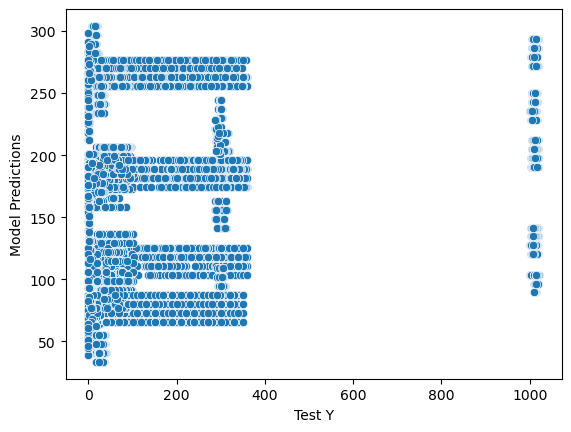

In [234]:
#A scatter plot of the model predictions against the true values. If we had a straight fitting line the model would have performed well.
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<AxesSubplot:xlabel='Error', ylabel='Density'>

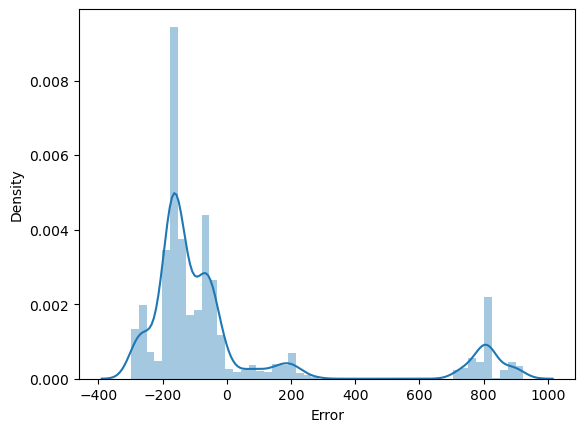

In [235]:
# The model would have a good prediction if the plot was a Gaussian distribution with a peak at Error=0
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']
sns.distplot(pred_df['Error'],bins=50)

In [236]:
#Get the mean absolute error and the mean squared error
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [237]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

220.43882542389647

In [253]:
#If one compares the mean absolute error with the mean value of the column value, it is evident that the error is big
find_value=df.describe()
print(find_value.loc[['mean'],['value']],find_value.loc[['max'],['value']])

          value
mean  153.45302       value
max  1021.9


In [ ]:
#It was also calculated some blocks above at the test predictions
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

In [18]:
#Now I do the same but I use:
#Activation function:sigmoid, optimasation method: stochastic gradient descent , error function: mean absolute error

In [254]:
#The columns that I will use as numpy array
X = df[['location_id','value_type_id']].values

# Label that I am going to predict
y = df['value'].values

# Here I do the train and test Split:30% of the data is used for the test size
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [255]:
#Normalizing the data 

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [256]:
#Set up a sequential model
model = Sequential()
#Add dense layers (densely connected nn) to the sequential model
#units=4, 3, 2, 1 is the number of neurons on each layer
model.add(Dense(units=4,activation='sigmoid'))
model.add(Dense(units=4,activation='sigmoid'))
model.add(Dense(units=3,activation='sigmoid'))
model.add(Dense(units=2,activation='sigmoid'))
model.add(Dense(units=1))



In [257]:
#Compile the model
model.compile(optimizer='sgd',loss='mae')
#Fit the model: One epoch is one pass over the entire data set. Here we use 100 epochs
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
8897/8897 [==============================] - 16s 2ms/step - loss: 151.7781
Epoch 2/100
8897/8897 [==============================] - 16s 2ms/step - loss: 151.6135
Epoch 3/100
8897/8897 [==============================] - 16s 2ms/step - loss: 151.6127
Epoch 4/100
8897/8897 [==============================] - 16s 2ms/step - loss: 151.6132
Epoch 5/100
8897/8897 [==============================] - 16s 2ms/step - loss: 151.6133
Epoch 6/100
8897/8897 [==============================] - 16s 2ms/step - loss: 151.6131
Epoch 7/100
8897/8897 [==============================] - 17s 2ms/step - loss: 151.6135
Epoch 8/100
8897/8897 [==============================] - 17s 2ms/step - loss: 151.6135
Epoch 9/100
8897/8897 [==============================] - 17s 2ms/step - loss: 151.6131
Epoch 10/100
8897/8897 [==============================] - 18s 2ms/step - loss: 151.6131
Epoch 11/100
8897/8897 [==============================] - 18s 2ms/step - loss: 151.6131
Epoch 12/100
8897/8897 [=================

In [258]:
#values predicted (numpy array)
test_predictions = model.predict(X_test)
# I turn the predicted values into series in order to use them in a dataframe
test_predictions = pd.Series(test_predictions.reshape(X_test.shape[0],))
# The true values dataframe
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

3813/3813 [==============================] - 5s 1ms/step


In [259]:
#I make a dataframe that combines the above pred_df with the predicted values
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test Y','Model Predictions']

<AxesSubplot:xlabel='Test Y', ylabel='Model Predictions'>

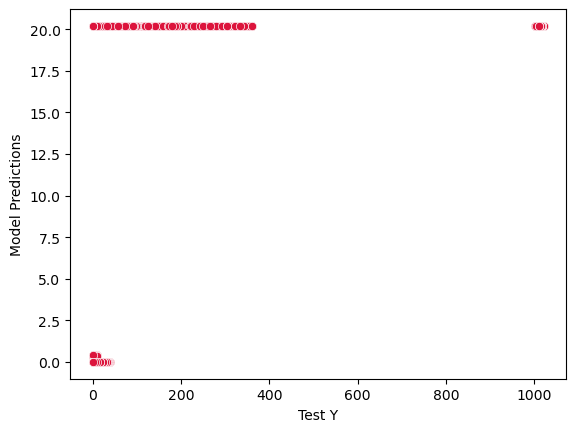

In [260]:
#A scatter plot of the model predictions against the true values. If we had a straight fitting line the model would have performed well.
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df, color='crimson')



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<AxesSubplot:xlabel='Error', ylabel='Density'>

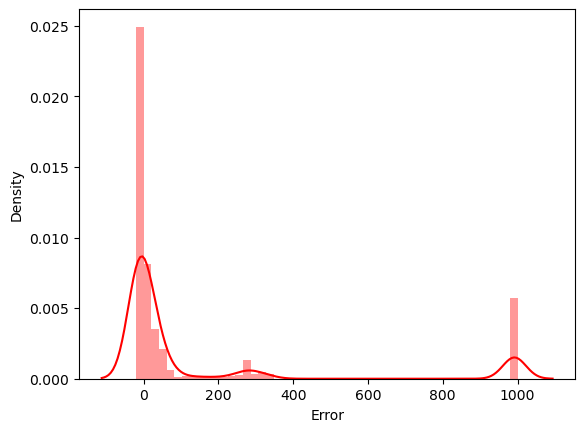

In [261]:
# The model would have a good prediction if the plot  was a Gaussian distribution with a peak at Error=0
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']
sns.distplot(pred_df['Error'],bins=50,color='r')

In [262]:
#Get the mean absolute error and the mean squared error


In [263]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

149.6466939230707

In [264]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

120691.44931354342

In [ ]:
#It seems that the second test, where we used the sigmoid application function and  sgd as an optimizer, gives better results

In [4]:
###PART THREE (please run PART ONE first)

In [149]:
import shap
#In this part I use the shapley values technic in order to check  which features affect our model decisions and how they contribute to global predictions

identifier      -0.174804
day             -0.012796
minute          -0.009579
hour            -0.006169
location_id      0.010312
source_id        0.015135
id               0.018221
month            0.021303
value_type_id    0.191069
value            1.000000
Name: value, dtype: float64


<AxesSubplot:>

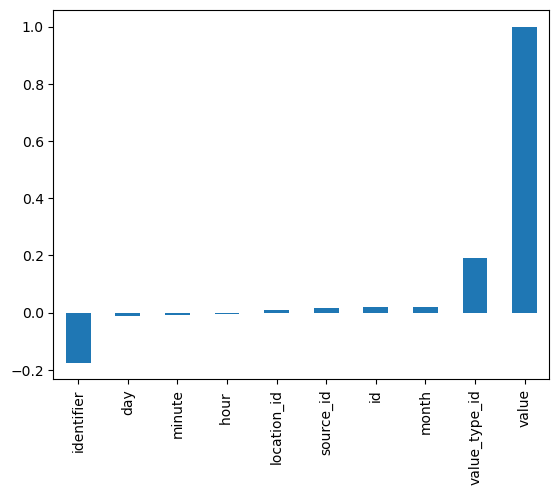

In [217]:
#Before doing this I check the colleration of 'value' with the rest features
df.drop('year',axis=1)
print(df.corr()['value'].sort_values().dropna())
df.corr()['value'].sort_values().dropna().plot(kind='bar')

In [ ]:
#It seems that value_type_id has the closest positive correlation with value and identifier the closest negative

In [214]:
#I will use trees ensemble model to look at feature importance and compare it with SHAP feature importance.
#The columns that I will use 
X = df[['location_id','value_type_id','source_id','month','day','identifier']]

# Label that I am going to predict
y = df['value'].values

# Here I do the train and test Split:30% of the data is used for the test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [138]:
#I will build the model with Random Forest Classifier :
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

In [139]:
y_pred = model.predict(X_test)

In [140]:
#the mean square error of the model
mse = mean_squared_error(y_test, y_pred)**(0.5)
mse

42.41417778233642

In [220]:
#Here I create the shap values
#The shap_values are  the average contribution of each feature to each prediction for each sample based on all possible features
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
print('Expected Value:', explainer.expected_value)

Expected Value: [152.78495897]


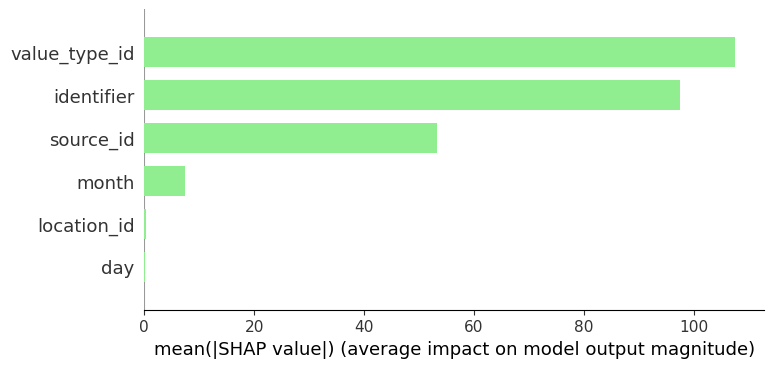

In [142]:
#Here is a summary plot which gives a global picture and shows how each feature impacts the model.
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar",color='lightgreen')
